In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import fits
from IPython.display import display, Math
from scipy.optimize import minimize
import astropy.units as u
from astropy.modeling.models import custom_model
from scipy import interpolate
import keras
from scipy.optimize import Bounds
import sys
sys.path.insert(0, '/home/carterrhea/Documents/LUCI/')  # Location of Luci
import LUCI.LuciFit as lfit
import emcee
import corner


In [2]:
# Read in Data

sigma_info = []
velocity_info = []
res_info = []
spectrum = fits.open('../Data/Reference-Spectrum-R5000.fits')
header = spectrum[0].header
spec = spectrum[1].data
channel = []
counts = []
for chan in spec:
    channel.append(chan[0])
    counts.append(chan[1])

axis = channel
sky = counts
velocity = header['VELOCITY']
sigma = header['BROADEN']
print(velocity, sigma)

0 10


In [3]:
# Machine Learning Reference Spectrum
ref_spec = fits.open('../ML/Reference-Spectrum-R5000.fits')[1].data
channel = []
counts = []
for chan in ref_spec:  # Only want SN3 region
    channel.append(chan[0])
    counts.append(np.real(chan[1]))
min_ = np.argmin(np.abs(np.array(channel)-14700))
max_ = np.argmin(np.abs(np.array(channel)-15600))
wavenumbers_syn = channel[min_:max_]

In [4]:
f = interpolate.interp1d(axis, sky, kind='slinear')
sky_corr = (f(wavenumbers_syn))
sky_corr_scale = np.max(sky_corr)
sky_corr = sky_corr/sky_corr_scale
print(sky_corr.shape)

(460,)


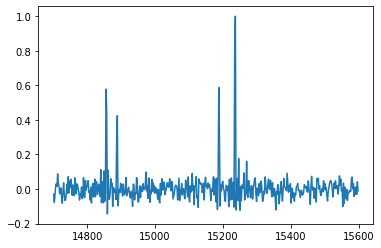

In [5]:
plt.plot(wavenumbers_syn, sky_corr)

In [6]:
fit = lfit.Fit(sky, axis, wavenumbers_syn, 'sinc', ['Halpha', 'NII6583', 'NII6548','SII6716', 'SII6731'], [1,1,1,1,1], [1,1,1,2,2],
                keras.models.load_model('../ML/R5000-PREDICTOR-I'),
                 bayes_bool=False)
fit_dict = fit.fit()
print(fit_dict['velocities'])
print(fit_dict['fit_sol'])

2.0177513694478546e-07
[16.1092213712163, 16.109221371213312, 16.109221371209607, 16.10922137119658, 16.109221371226493]
[ 8.67882075e-01  1.52365805e+04  9.83574457e-01  4.85470896e-01
  1.51888809e+04  9.81262500e-01  5.44786301e-02  1.52709487e+04
  9.86564410e-01  3.87944577e-01  1.48879739e+04  9.67881308e-01
  5.45610937e-01  1.48561668e+04  9.46433873e-01 -4.19147398e-04]


(14800.0, 15300.0)

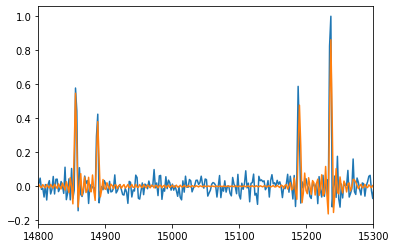

In [7]:
plt.plot(axis, sky)
plt.plot(axis, fit_dict['fit_vector'])
plt.xlim(14800, 15300)

In [8]:
fit_dict

{'fit_sol': array([ 8.67882075e-01,  1.52365805e+04,  9.83574457e-01,  4.85470896e-01,
         1.51888809e+04,  9.81262500e-01,  5.44786301e-02,  1.52709487e+04,
         9.86564410e-01,  3.87944577e-01,  1.48879739e+04,  9.67881308e-01,
         5.45610937e-01,  1.48561668e+04,  9.46433873e-01, -4.19147398e-04]),
 'fit_uncertainties': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'fit_vector': array([-5.46593250e-04,  2.69137577e-04, -8.76591776e-04, -8.02995684e-04,
         4.39114050e-04, -7.49220502e-04, -1.08521466e-03,  5.38857292e-04,
        -5.37452714e-04, -1.36475202e-03,  5.50530159e-04, -2.54935611e-04,
        -1.61155767e-03,  4.64400751e-04,  7.35276178e-05, -1.79749394e-03,
         2.78931780e-04,  4.20831301e-04, -1.89895408e-03,  5.60472127e-06,
         7.55401904e-04, -1.89974355e-03, -3.37968284e-04,  1.04586654e-03,
        -1.79157407e-03, -7.25996234e-04,  1.26358041e-03, -1.57864545e-03,
        -1.12758289e-03,  1.38565963e-03, 